In [1]:
import numpy as np
import pandas as pd

In [2]:

# Load back the arrays
A_array_loaded = pd.read_csv('A_1.csv').to_numpy()
B_array_loaded = pd.read_csv('B_1.csv').to_numpy()
C_array_loaded = pd.read_csv('C_1.csv').to_numpy()
D_array_loaded = pd.read_csv('D_1.csv').to_numpy()

# Check shapes
print("A_array:", A_array_loaded.shape)
print("B_array:", B_array_loaded.shape)
print("C_array:", C_array_loaded.shape)
print("D_array:", D_array_loaded.shape)


A_array: (41, 20)
B_array: (635, 20)
C_array: (5954, 20)
D_array: (993, 20)


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# --- Combine all datasets ---
X = np.concatenate([
    A_array_loaded[:, (0, 3,4,5, 19)],
    B_array_loaded[:, (0, 3,4,5, 19)],
    C_array_loaded[:, (0, 3,4,5, 19)],
    D_array_loaded[:, (0, 3,4,5, 19)]
], axis=0)

y = np.array(
    [0]*len(A_array_loaded) +
    [1]*len(B_array_loaded) +
    [2]*len(C_array_loaded) +
    [3]*len(D_array_loaded)
)

# --- Normalize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- One-hot encode labels ---
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# --- Build a simple DNN ---
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# --- Compile ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Save best model callback ---
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# --- Train ---
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=8,
    callbacks=[checkpoint],
    verbose=1
)

# --- Load best saved model ---
best_model = tf.keras.models.load_model('best_model.h5')

# --- Final evaluation ---
loss, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Best Model Test Accuracy: {acc:.4f}")

# --- Predict and analyze ---
y_pred = np.argmax(best_model.predict(X_test), axis=1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20
753/763 [============================>.] - ETA: 0s - loss: 0.8570 - accuracy: 0.7173
Epoch 1: val_accuracy improved from -inf to 0.81049, saving model to best_model.h5
763/763 [==============================] - 6s 7ms/step - loss: 0.8537 - accuracy: 0.7178 - val_loss: 0.5199 - val_accuracy: 0.8105
Epoch 2/20
755/763 [============================>.] - ETA: 0s - loss: 0.5155 - accuracy: 0.8142
Epoch 2: val_accuracy improved from 0.81049 to 0.82689, saving model to best_model.h5
763/763 [==============================] - 5s 6ms/step - loss: 0.5170 - accuracy: 0.8147 - val_loss: 0.4678 - val_accuracy: 0.8269
Epoch 3/20
759/763 [============================>.] - ETA: 0s - loss: 0.4947 - accuracy: 0.8126
Epoch 3: val_accuracy did not improve from 0.82689
763/763 [==============================] - 5s 6ms/step - loss: 0.4956 - accuracy: 0.8121 - val_loss: 0.4626 - val_accuracy: 0.8216
Epoch 4/20
762/763 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.8200
Epo

C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Perdorues\.conda\envs\pytorchenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:

y = np.array(
    [0]*(len(A_array_loaded) + len(B_array_loaded)) +
    [1]*(len(C_array_loaded) + len(D_array_loaded))

)

# - Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# encode labels ---
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


# Compile 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Save best model callback
checkpoint = ModelCheckpoint(
    'best_model_2.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

#### Train
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=8,
    callbacks=[checkpoint],
    verbose=1
)

# best saved model
best_model = tf.keras.models.load_model('best_model_2.h5')

#evaluation
loss, acc = best_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n Best Model Test Accuracy: {acc:.4f}")


y_pred = np.argmax(best_model.predict(X_test), axis=1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/20
763/763 [==============================] - ETA: 0s - loss: 0.2738 - accuracy: 0.8995
Epoch 1: val_accuracy improved from -inf to 0.94951, saving model to best_model_2.h5
763/763 [==============================] - 6s 7ms/step - loss: 0.2738 - accuracy: 0.8995 - val_loss: 0.1482 - val_accuracy: 0.9495
Epoch 2/20
756/763 [============================>.] - ETA: 0s - loss: 0.1824 - accuracy: 0.9324
Epoch 2: val_accuracy improved from 0.94951 to 0.95213, saving model to best_model_2.h5
763/763 [==============================] - 5s 6ms/step - loss: 0.1823 - accuracy: 0.9324 - val_loss: 0.1450 - val_accuracy: 0.9521
Epoch 3/20
761/763 [============================>.] - ETA: 0s - loss: 0.1735 - accuracy: 0.9364
Epoch 3: val_accuracy did not improve from 0.95213
763/763 [==============================] - 5s 6ms/step - loss: 0.1736 - accuracy: 0.9364 - val_loss: 0.1374 - val_accuracy: 0.9521
Epoch 4/20
755/763 [============================>.] - ETA: 0s - loss: 0.1668 - accuracy: 0.9374

## 15 fold validation for 4 class (A-D)


 -> Fold 1
16/16 [==============================] - 0s 2ms/step
Fold 1: ACC=0.835, AUC=0.871, F1=0.813, SEN=0.835

 -> Fold 2
16/16 [==============================] - 0s 3ms/step
Fold 2: ACC=0.841, AUC=0.922, F1=0.822, SEN=0.841

 -> Fold 3
16/16 [==============================] - 0s 3ms/step
Fold 3: ACC=0.833, AUC=0.918, F1=0.807, SEN=0.833

 -> Fold 4
16/16 [==============================] - 0s 3ms/step
Fold 4: ACC=0.844, AUC=0.929, F1=0.804, SEN=0.844

 -> Fold 5
16/16 [==============================] - 0s 2ms/step
Fold 5: ACC=0.835, AUC=0.915, F1=0.803, SEN=0.835

 -> Fold 6
16/16 [==============================] - 0s 3ms/step
Fold 6: ACC=0.813, AUC=0.904, F1=0.775, SEN=0.813

 -> Fold 7
16/16 [==============================] - 0s 3ms/step
Fold 7: ACC=0.823, AUC=0.910, F1=0.789, SEN=0.823

 -> Fold 8
16/16 [==============================] - 0s 3ms/step
Fold 8: ACC=0.803, AUC=0.906, F1=0.784, SEN=0.803

 -> Fold 9
16/16 [==============================] - 0s 2ms/step
Fold 9: ACC=0.7

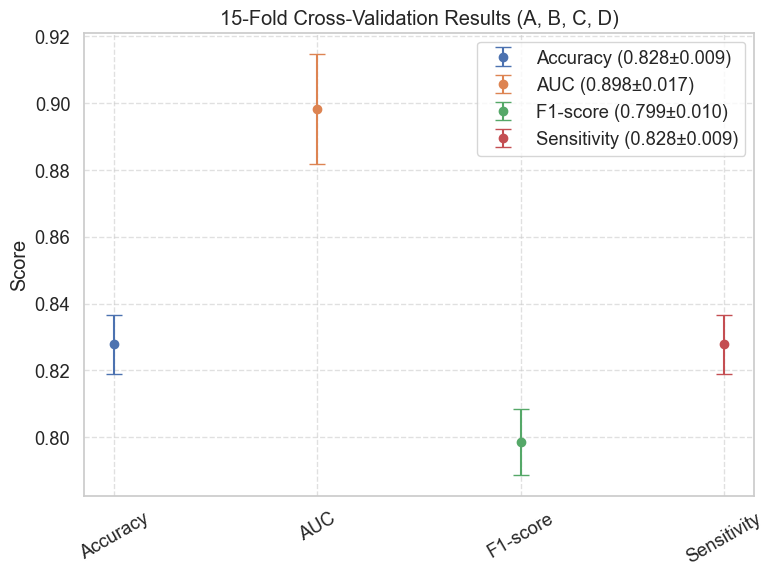


 Best model saved as: best_model_15fold_4_Classes.keras


In [15]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt


X = np.concatenate([
    A_array_loaded[:, (0, 3,4,5, 19)],
    B_array_loaded[:, (0, 3,4,5, 19)],
    C_array_loaded[:, (0, 3,4,5, 19)],
    D_array_loaded[:, (0, 3,4,5, 19)]
], axis=0)

y = np.array(
    [0]*len(A_array_loaded) + 
    [1]*len(B_array_loaded) +
    [2]*len(C_array_loaded) + 
    [3]*len(D_array_loaded)
)

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

accs, aucs, f1s, sens = [], [], [], []
best_auc = -1
best_model = None

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
    print(f"\n -> Fold {fold}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    y_train_cat = to_categorical(y_train, num_classes=4)
    y_test_cat = to_categorical(y_test, num_classes=4)

    # --- Model ---
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # --- Train ---
    history = model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=20,
        batch_size=8,
        verbose=0
    )

    # --- Predict ---
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # --- Metrics ---
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    f1 = f1_score(y_test, y_pred, average='weighted')
    sensitivity = recall_score(y_test, y_pred, average='weighted') 


    accs.append(acc)
    aucs.append(auc)
    f1s.append(f1)
    sens.append(sensitivity)

    print(f"Fold {fold}: ACC={acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}, SEN={sensitivity:.3f}")

    # --- Save best model ---
    if auc > best_auc:
        best_auc = auc
        best_model = model
        model.save("best_model_15fold_4_Classes.keras")


accs, aucs, f1s, sens = map(np.array, [accs, aucs, f1s, sens])


def mean_ci(data):
    mean = np.mean(data)
    ci = 1.96 * np.std(data) / np.sqrt(len(data))
    return mean, ci

metrics = {
    "Accuracy": accs,
    "AUC": aucs,
    "F1-score": f1s,
    "Sensitivity": sens,
}

# --- Plot results ---
plt.figure(figsize=(8, 6))
for i, (name, values) in enumerate(metrics.items()):
    mean, ci = mean_ci(values)
    plt.errorbar(i, mean, yerr=ci, fmt='o', capsize=6, label=f"{name} ({mean:.3f}±{ci:.3f})")

plt.xticks(range(len(metrics)), metrics.keys(), rotation=30)
plt.ylabel("Score")
plt.title("15-Fold Cross-Validation Results (A, B, C, D)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print("\n Best model saved as: best_model_15fold_4_Classes.keras")

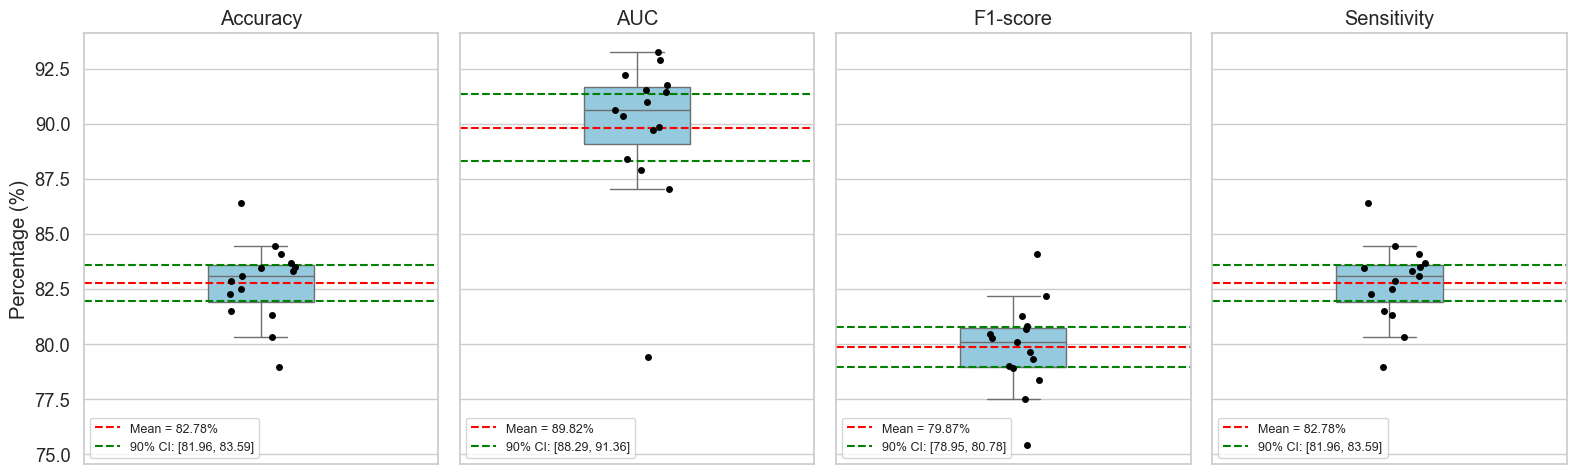

In [16]:
import seaborn as sns
from scipy import stats

# --- Data ---
ACC = accs
AUC = aucs
F1  = f1s
SEN = sens

metrics = {"Accuracy": ACC, "AUC": AUC, "F1-score":  F1, "Sensitivity":  SEN}

# --- Compute 90% confidence intervals ---
def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# --- Prepare plot ---
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    # Boxplot
    sns.boxplot(y=values*100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    # Individual points
    sns.stripplot(y=values*100, ax=ax, color="black", size=5, jitter=0.1)
    
    # Mean + CI lines
    ax.axhline(mean*100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low*100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high*100, color="green", linestyle="--")
    
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    #ax.set_ylim(90, 100)
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()


## 15 fold validation for 2 class (AB vs CD)


 -> Fold 1
Epoch 1/20
890/890 [==============================] - 6s 6ms/step - loss: 0.2419 - accuracy: 0.9262 - val_loss: 0.1689 - val_accuracy: 0.9371
Epoch 2/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1763 - accuracy: 0.9355 - val_loss: 0.1620 - val_accuracy: 0.9332
Epoch 3/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1621 - accuracy: 0.9380 - val_loss: 0.1581 - val_accuracy: 0.9332
Epoch 4/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1591 - accuracy: 0.9415 - val_loss: 0.1582 - val_accuracy: 0.9352
Epoch 5/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1548 - accuracy: 0.9390 - val_loss: 0.1562 - val_accuracy: 0.9371
Epoch 6/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1508 - accuracy: 0.9417 - val_loss: 0.1531 - val_accuracy: 0.9371
Epoch 7/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1504 - accuracy: 0.9412 - val_loss: 0.1523 - val_accuracy: 0

Epoch 17/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1447 - accuracy: 0.9474 - val_loss: 0.1297 - val_accuracy: 0.9489
Epoch 18/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1453 - accuracy: 0.9445 - val_loss: 0.1294 - val_accuracy: 0.9489
Epoch 19/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1467 - accuracy: 0.9445 - val_loss: 0.1288 - val_accuracy: 0.9489
Epoch 20/20
16/16 [==============================] - 0s 3ms/step
Fold 3: ACC=0.947, AUC=0.964, F1=0.939, SEN=0.994

 -> Fold 4
Epoch 1/20
890/890 [==============================] - 6s 6ms/step - loss: 0.2937 - accuracy: 0.8807 - val_loss: 0.1560 - val_accuracy: 0.9370
Epoch 2/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1661 - accuracy: 0.9369 - val_loss: 0.1520 - val_accuracy: 0.9311
Epoch 3/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1602 - accuracy: 0.9380 - val_loss: 0.1527 - val_accuracy: 0.9311
Epoch 4/20
890/890

890/890 [==============================] - 5s 6ms/step - loss: 0.1487 - accuracy: 0.9445 - val_loss: 0.1296 - val_accuracy: 0.9528
Epoch 13/20
890/890 [==============================] - 5s 5ms/step - loss: 0.1495 - accuracy: 0.9422 - val_loss: 0.1325 - val_accuracy: 0.9469
Epoch 14/20
890/890 [==============================] - 5s 5ms/step - loss: 0.1478 - accuracy: 0.9445 - val_loss: 0.1375 - val_accuracy: 0.9390
Epoch 15/20
890/890 [==============================] - 5s 5ms/step - loss: 0.1501 - accuracy: 0.9429 - val_loss: 0.1299 - val_accuracy: 0.9528
Epoch 16/20
890/890 [==============================] - 5s 5ms/step - loss: 0.1483 - accuracy: 0.9448 - val_loss: 0.1280 - val_accuracy: 0.9567
Epoch 17/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1458 - accuracy: 0.9457 - val_loss: 0.1339 - val_accuracy: 0.9429
Epoch 18/20
890/890 [==============================] - 5s 5ms/step - loss: 0.1449 - accuracy: 0.9422 - val_loss: 0.1356 - val_accuracy: 0.9390
Epoch 19/20

890/890 [==============================] - 5s 6ms/step - loss: 0.1549 - accuracy: 0.9400 - val_loss: 0.1449 - val_accuracy: 0.9528
Epoch 8/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1543 - accuracy: 0.9397 - val_loss: 0.1433 - val_accuracy: 0.9528
Epoch 9/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1512 - accuracy: 0.9428 - val_loss: 0.1436 - val_accuracy: 0.9528
Epoch 10/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1505 - accuracy: 0.9452 - val_loss: 0.1449 - val_accuracy: 0.9488
Epoch 11/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1485 - accuracy: 0.9421 - val_loss: 0.1440 - val_accuracy: 0.9488
Epoch 12/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1479 - accuracy: 0.9404 - val_loss: 0.1427 - val_accuracy: 0.9508
Epoch 13/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1483 - accuracy: 0.9431 - val_loss: 0.1431 - val_accuracy: 0.9508
Epoch 14/20
8

890/890 [==============================] - 5s 6ms/step - loss: 0.1751 - accuracy: 0.9311 - val_loss: 0.1569 - val_accuracy: 0.9350
Epoch 3/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1657 - accuracy: 0.9391 - val_loss: 0.1570 - val_accuracy: 0.9409
Epoch 4/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1616 - accuracy: 0.9384 - val_loss: 0.1574 - val_accuracy: 0.9409
Epoch 5/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1576 - accuracy: 0.9424 - val_loss: 0.1551 - val_accuracy: 0.9409
Epoch 6/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1581 - accuracy: 0.9397 - val_loss: 0.1556 - val_accuracy: 0.9390
Epoch 7/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1522 - accuracy: 0.9424 - val_loss: 0.1571 - val_accuracy: 0.9449
Epoch 8/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1525 - accuracy: 0.9429 - val_loss: 0.1521 - val_accuracy: 0.9449
Epoch 9/20
890/89

Epoch 18/20
890/890 [==============================] - 5s 5ms/step - loss: 0.1432 - accuracy: 0.9457 - val_loss: 0.1502 - val_accuracy: 0.9429
Epoch 19/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1411 - accuracy: 0.9435 - val_loss: 0.1458 - val_accuracy: 0.9469
Epoch 20/20
16/16 [==============================] - 0s 3ms/step
Fold 14: ACC=0.943, AUC=0.943, F1=0.930, SEN=1.000

 -> Fold 15
Epoch 1/20
890/890 [==============================] - 6s 7ms/step - loss: 0.2475 - accuracy: 0.9120 - val_loss: 0.1668 - val_accuracy: 0.9370
Epoch 2/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1712 - accuracy: 0.9353 - val_loss: 0.1561 - val_accuracy: 0.9469
Epoch 3/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1660 - accuracy: 0.9380 - val_loss: 0.1542 - val_accuracy: 0.9429
Epoch 4/20
890/890 [==============================] - 5s 6ms/step - loss: 0.1585 - accuracy: 0.9362 - val_loss: 0.1503 - val_accuracy: 0.9449
Epoch 5/20
890/89

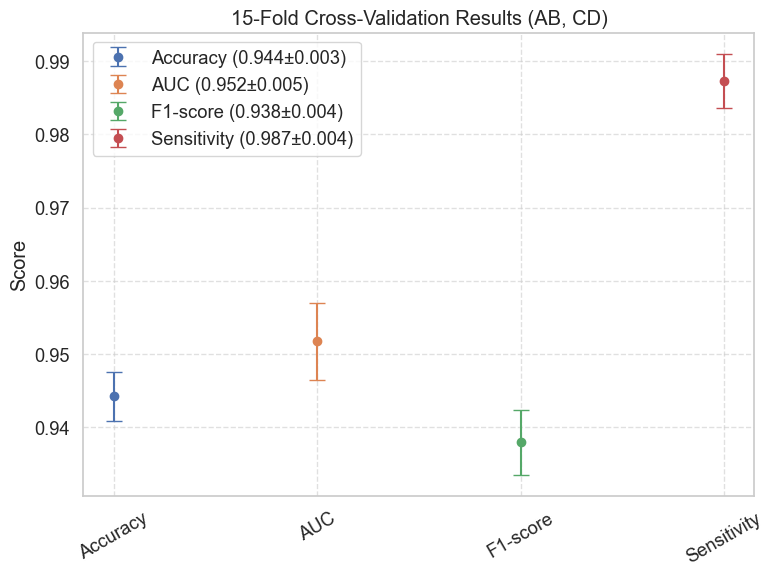


 Best model saved as: best_model_15fold_2_Classes.keras


In [17]:
y = np.array(
    [0]*(len(A_array_loaded) + len(B_array_loaded)) +
    [1]*(len(C_array_loaded) + len(D_array_loaded)) 

)

kfold = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

accs1, aucs1, f1s1, sens1 = [], [], [], []
best_auc = -1
best_model = None

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_scaled, y), 1):
    print(f"\n -> Fold {fold}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    y_train_cat = to_categorical(y_train, num_classes=2)
    y_test_cat = to_categorical(y_test, num_classes=2)

    # --- Model ---
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(8, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # --- Train ---
    history = model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=20,
        batch_size=8,
        verbose=1
    )

    # --- Predict ---
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # --- Metrics ---
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    f1 = f1_score(y_test, y_pred, average='weighted')

    # --- Confusion matrix ---
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    accs1.append(acc)
    aucs1.append(auc)
    f1s1.append(f1)
    sens1.append(sensitivity)

    print(f"Fold {fold}: ACC={acc:.3f}, AUC={auc:.3f}, F1={f1:.3f}, SEN={sensitivity:.3f}")

    #  best model s
    if auc > best_auc:
        best_auc = auc
        best_model = model
        model.save("best_model_15fold_2_Classes.keras")


accs1, aucs1, f1s1, sens1 = map(np.array, [accs1, aucs1, f1s1, sens1])


metrics = {
    "Accuracy": accs1,
    "AUC": aucs1,
    "F1-score": f1s1,
    "Sensitivity": sens1,
}

# --- Plot results ---
plt.figure(figsize=(8, 6))
for i, (name, values) in enumerate(metrics.items()):
    mean, ci = mean_ci(values)
    plt.errorbar(i, mean, yerr=ci, fmt='o', capsize=6, label=f"{name} ({mean:.3f}±{ci:.3f})")

plt.xticks(range(len(metrics)), metrics.keys(), rotation=30)
plt.ylabel("Score")
plt.title("15-Fold Cross-Validation Results (AB, CD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

print("\n Best model saved as: best_model_15fold_2_Classes.keras")

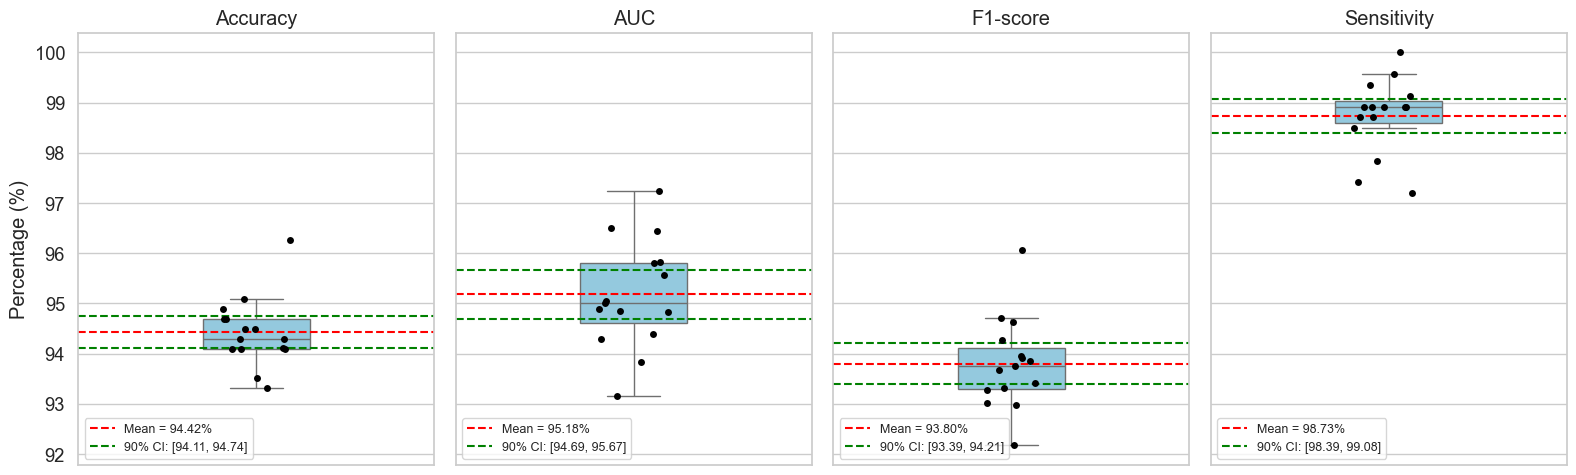

In [18]:
# --- Data 4 clsf AB vs CD ---
ACC = accs1
AUC = aucs1
F1  = f1s1
SEN = sens1

metrics = {"Accuracy": ACC, "AUC": AUC, "F1-score":  F1, "Sensitivity":  SEN}

#PLOT
sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

for i, (name, values) in enumerate(metrics.items()):
    mean, low, high = confidence_interval(values)
    ax = axes[i]

    # Boxplot
    sns.boxplot(y=values*100, ax=ax, color="skyblue", width=0.3, fliersize=0)
    sns.stripplot(y=values*100, ax=ax, color="black", size=5, jitter=0.1)
    
    ax.axhline(mean*100, color="red", linestyle="--", label=f"Mean = {mean*100:.2f}%")
    ax.axhline(low*100, color="green", linestyle="--", label=f"90% CI: [{low*100:.2f}, {high*100:.2f}]")
    ax.axhline(high*100, color="green", linestyle="--")
    
    ax.set_title(name)
    ax.set_xlabel('')
    ax.set_ylabel('Percentage (%)')
    ax.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()
